In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
img = cv2.imread(r'C:\Users\studentx\Desktop\image\hands1.jpg')
img0 = cv2.imread(r'C:\Users\studentx\Downloads\lung_data\DFmodel\case6\def\motion0.nii130.jpg')
img5 = cv2.imread(r'C:\Users\studentx\Downloads\lung_data\DFmodel\case6\def\motion5.nii130.jpg')
img9 = cv2.imread(r'C:\Users\studentx\Downloads\lung_data\DFmodel\case6\def\motion9.nii130.jpg')

In [4]:
cv2.imshow('img0',img0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
sift = cv2.xfeatures2d.SIFT_create()
kp0 = sift.detect(img0, None)
kp0, des0 = sift.compute(img0, kp0)
kp5 = sift.detect(img5, None)
kp5, des5 = sift.compute(img5, kp5)
kp9 = sift.detect(img9, None)
kp9, des9 = sift.compute(img9, kp9)
print(des0.shape, img0.shape)

(160, 128) (128, 256, 3)


In [6]:
img_sift0 = cv2.drawKeypoints(img0, kp0, outImage=np.array([]), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_sift5 = cv2.drawKeypoints(img5, kp5, outImage=np.array([]), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_sift9 = cv2.drawKeypoints(img9, kp9, outImage=np.array([]), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [7]:
cv2.imshow('img0',img_sift0)
cv2.imshow('img5',img_sift5)
cv2.imshow('img9',img_sift9)
cv2.waitKey(0)
cv2.destroyAllWindows()

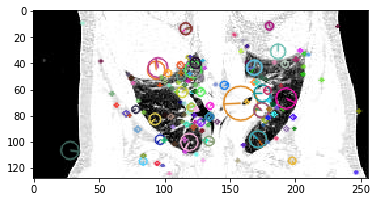

In [14]:

plt.imshow(img_sift0); plt.show()

In [ ]:
# remove not good matches
num_good_match = int(len(matches)*0.01)
matches = matches[:num_good_match]

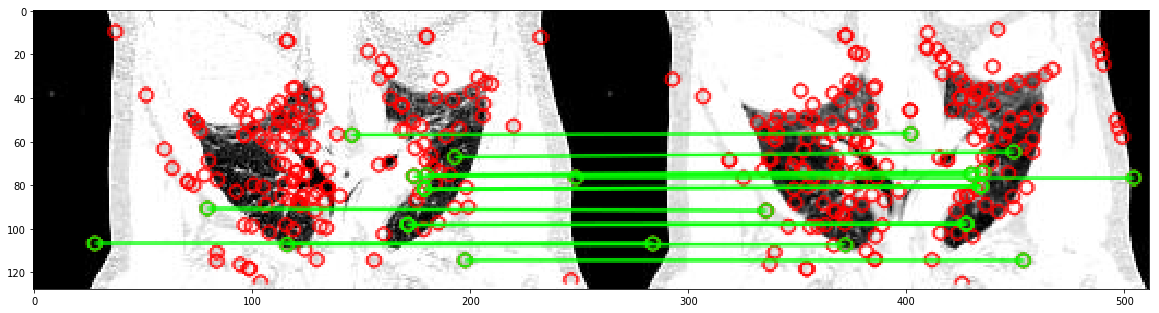

In [12]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des0, des5, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper

for i, (m, n) in enumerate(matches):
    if m.distance < 0.25*n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                    singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)
img3 = cv2.drawMatchesKnn(img0, kp0, img5, kp5, matches, None, **draw_params)
plt.figure(figsize=(20, 20))
plt.imshow(img3); plt.show()

In [13]:
img_matches = cv2.drawMatches(img0, kp0, img5, kp5, matches, img5, flags=2) # Show top 10 matches
#plt.figure(figsize=(16, 16))
plt.title(type(detector))
plt.imshow(img_matches); plt.show()

TypeError: Expected cv::DMatch for argument 'matches1to2'

In [16]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
for i, match in enumerate(matches):
    points1[i, :] = kp0[match.queryIdx].pt
    points2[i, :] = kp5[match.trainIdx].pt
# find homography
h,mask = cv2.findHomography(points1,points2,cv2.RANSAC)
print(h)

AttributeError: 'list' object has no attribute 'queryIdx'

In [17]:
# use homography
warped = cv2.warpPerspective(img0,h)
plt.imshow(warped);plt.show()

NameError: name 'h' is not defined

In [ ]:
# compare
com = warped - img5
plt.imshow(com);plt.show()

In [ ]:
1. Find feature points in each image
2. Use RANSAC to find keypoint matches
3. Use homography matrix to get transferring info
4. Merge two images 